In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_up_ETH0.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,ETH,up,2017-03-16 03:00:07,coinstats,0,0,#Ethereum #ETH,Ethereum - ETH Price: $38.413 Change in 1h: +4...
1,ETH,up,2017-03-16 03:00:07,EthereumPrice_,1,0,#Ethereum,#Ethereum: Ether Price Index 1 ETH =0.030242Ƀ ...
2,ETH,up,2017-03-16 03:00:23,CollinCrypto,1,16,#Ethereum,.@CollinCrypto $ETC / #Ethereum Update.
3,ETH,up,2017-03-16 03:00:33,coinstats,0,0,#Ethereum #ETC,Ethereum Classic - ETC Price: $1.83317 Change ...
4,ETH,up,2017-03-16 03:01:51,ZenGnarly,0,1,NaN,Ethereum prices been going up
...,...,...,...,...,...,...,...,...
490,ETH,up,2017-03-16 08:57:06,GuardiaDigital,0,0,#Dinero,Ethereum: el adversario mortal del Bitcoin - #...
491,ETH,up,2017-03-16 08:57:10,r_Ethereum,0,0,#Ethereum,Ka Booom :) #Ethereum http://ift.tt/2nHGMzz
492,ETH,up,2017-03-16 08:58:44,FellerMath,0,0,NaN,The cryptocurrency revolution will begin with ...
493,ETH,up,2017-03-16 08:59:26,bravenewcoin,0,0,#Ethereum #Explorer,"Matthew Tan The #Ethereum Block #Explorer, Tok..."


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [ethereum, eth, price, :, $, 38.413, change, i...
1      [ethereum, :, ether, price, index, 1, eth, =0....
2      [., @, collincrypto, $, etc, ethereum, update, .]
3      [ethereum, classic, etc, price, :, $, 1.83317,...
4                    [ethereum, prices, been, going, up]
                             ...                        
490    [ethereum, :, el, adversario, mortal, del, bit...
491                 [ka, booom, :, ), ethereum, 2nhgmzz]
492    [the, cryptocurrency, revolution, will, begin,...
493    [matthew, tan, the, ethereum, block, explorer,...
494    [matthew, tan, the, ethereum, block, explorer,...
Name: text, Length: 495, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [ethereum, eth, price, :, $, change, :, %, mar...
1      [ethereum, :, price, index, eth, =0.030242ƀ, x...
2      [., @, collincrypto, $, etc, ethereum, update, .]
3      [ethereum, classic, etc, price, :, $, change, ...
4                              [ethereum, prices, going]
                             ...                        
490    [ethereum, :, el, adversario, mortal, del, bit...
491                          [ka, booom, :, ), ethereum]
492    [cryptocurrency, revolution, begin, gen, ., ba...
493    [matthew, tan, ethereum, block, explorer, ,, t...
494    [matthew, tan, ethereum, block, explorer, ,, t...
Name: text, Length: 495, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

924

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

924


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

924

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

924

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

549.8112141166187

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.12281789400335097

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.08118986442088408

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
724,"[0.00015784417337272316, -0.002358474768698215...",blognone,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.592276,0.001463,1.590814,NaN
725,"[0.0008850180893205106, 0.0026202343869954348,...",seminar,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.629117,0.001463,1.627655,NaN
479,"[0.0010115171317011118, 0.00043230870505794883...",private,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.648569,0.004388,1.644181,NaN
599,"[-0.0027730348519980907, -0.001178295351564884...",mature,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.646931,0.001463,1.645468,NaN
292,"[0.004116659983992577, -0.003216807497665286, ...",tendance,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.661580,0.001463,1.660118,NaN
406,"[-0.0008202080498449504, -0.000338764482876285...",ndmjww,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.662554,0.001463,1.661092,NaN
805,"[0.0010946979746222496, 0.004378379322588444, ...",ndqsbf,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.665242,0.001463,1.663779,NaN
441,"[-0.0014209127984941006, -0.004912819713354111...",byteball,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.668092,0.001463,1.666629,NaN
584,"[-0.003915867768228054, -0.004538819659501314,...",coincheck,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.674058,0.002925,1.671133,NaN
574,"[0.003540296573191881, -0.0035790533293038607,...",trader,0,"[-0.00034757628, -0.00059768563, 0.00027042348...",0.682198,0.002925,1.679273,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
326,"[0.002031361684203148, -0.0027238389011472464,...",crowdsale,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.513531,0.005850,1.507680,NaN
908,"[-0.001299506751820445, -0.002419249387457967,...",string,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.565153,0.002925,1.562228,NaN
690,"[0.0031644748523831367, 0.0029071224853396416,...",gründe,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.599097,0.007313,1.591784,NaN
730,"[-0.00046217694762162864, 0.004777987487614155...",doge,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.597393,0.004388,1.593005,NaN
652,"[-0.002097101416438818, 0.002516921143978834, ...",result,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.598717,0.004388,1.594329,NaN
108,"[-0.0006228373968042433, 0.0016092746518552303...",fall,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.604889,0.001463,1.603426,NaN
410,"[0.00027696791221387684, 0.002248313743621111,...",ndmjwl,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.605917,0.001463,1.604454,NaN
169,"[-0.0014231697423383594, -0.003553367452695965...",want,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.618006,0.005850,1.612156,NaN
316,"[0.0028669897001236677, 0.00252482108771801, 0...",bite,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.627099,0.002925,1.624174,NaN
228,"[0.0010301341535523534, 0.003946286626160145, ...",monthly,1,"[0.00023621692, -9.4899915e-05, 0.00016166287,...",0.628001,0.002925,1.625076,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
57,"[-0.006819653324782848, -0.0027368830051273108...",blockchain,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.268116,0.102376,1.165740,NaN
17,"[0.0007660429691895843, 0.002797477412968874, ...",watch,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.353991,0.080438,1.273552,NaN
364,"[-0.004125868435949087, 0.0026273683179169893,...",token,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.330657,0.020475,1.310182,NaN
271,"[-0.003638932481408119, 0.0014664848567917943,...",trade,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.341467,0.020475,1.320992,NaN
211,"[0.00045134953688830137, 0.0041121831163764, -...",alert,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.374330,0.016088,1.358242,NaN
3,"[-0.008406072854995728, 0.002820134861394763, ...",market,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.427936,0.064351,1.363585,NaN
201,"[-0.006458944175392389, 0.005445388145744801, ...",finance,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.416701,0.011700,1.405001,NaN
268,"[0.0017330789705738425, -0.004519287962466478,...",monero,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.426530,0.011700,1.414830,NaN
314,"[-0.005060032941401005, -0.00234111282043159, ...",transaction,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.438845,0.013163,1.425683,NaN
200,"[0.001471410389058292, 0.0038878212217241526, ...",invest,2,"[-0.00089768367, 0.00076005416, 0.0016455351, ...",0.443218,0.010238,1.432980,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.012484110891819, 0.0013982312520965934, 0....",ethereum,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.122818,0.873122,0.249696,NaN
45,"[-0.013053599745035172, 0.004825647454708815, ...",bitcoin,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.163983,0.201827,0.962156,NaN
1,"[-0.009724008850753307, -0.0019968783017247915...",price,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.225428,0.247165,0.978263,NaN
375,"[-0.005861436016857624, 0.0028093408327549696,...",analysis,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.269102,0.160877,1.108225,NaN
11,"[-0.009939836338162422, -0.002071268856525421,...",high,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.245072,0.102376,1.142696,NaN
105,"[-0.00909185316413641, 0.001998988911509514, 0...",cryptocurrency,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.289180,0.128701,1.160479,NaN
81,"[-0.0033550825901329517, 0.0020704471971839666...",dash,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.259306,0.029250,1.230056,NaN
2,"[-0.00682847062125802, 0.004398546647280455, 0...",change,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.289506,0.043875,1.245631,NaN
106,"[-0.0015147863887250423, -0.000470600847620517...",reach,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.356359,0.099451,1.256908,NaN
297,"[-0.004877398256212473, -0.0020137678366154432...",make,3,"[-0.0016346218, -2.474226e-06, 0.0012459126, 0...",0.276856,0.017550,1.259306,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

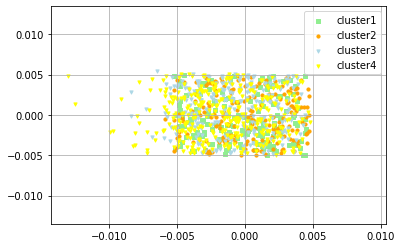

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 인플

166

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 투자

189

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 인플

244

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 긍정

325

In [63]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter|

In [64]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 6 # 인플

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 11 # 투자

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 11 # 인플

In [68]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 1 # 긍정

In [69]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [70]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [71]:
kmeans.inertia_

0.7720386981964111

In [72]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[0 0 0 0 3 2 0 0 2 3 0 0 3 0 3 2 3 0 1 1 1 2 1 1 3 0 1 3 2 3 2 1 1 1 2 2 3
 0 1 3 2 1 3 0 0 0 3 3 3 0 1 1 3 0 3 3 1 0 1 1 3 3 1 2 2 2 1 2 0 0 0 3 0 3
 3 3 1 1 0 2 3 0 1 1 2 1 3 3 2 1 1 1 3 3 2 1 2 2 0 0 0 3 3 1 2 0 0 1 1 2 3
 2 3 2 3 3 3 2 3 1 2 2 3 3 3 3 2 1 2 1 2 1 3 3 1 2 2 1 2 2 2 1 1 2 1 1 3 3
 2 3 0 2 3 2 3 2 3 1 1 2 3 3 3 2 2 1 1 2 2 3 0 3 3 2 2 3 2 3 3 1 2 2 3 3 3
 2 3 3 3 2 2 1 1 2 2 1 3 3 1 3 0 0 2 1 1 3 2 1 3 3 1 0 0 0 0 3 3 1 1 3 3 1
 2 1 2 2 1 2 1 1 2 1 1 2 2 2 1 1 1 1 1 2 2 3 2 0 2 3 3 2 1 2 3 1 2 2 1 2 3
 2 2 2 1 3 2 3 2 0 0 3 2 0 2 2 2 1 2 2 2 1 1 1 2 3 3 2 2 1 2 2 2 3 2 2 3 0
 1 0 1 2 1 3 1 2 1 1 3 3 3 3 2 3 3 0 0 3 3 1 2 2 1 1 3 1 3 0 3 3 3 3 2 2 2
 2 2 1 3 3 1 1 1 2 1 2 1 2 1 1 2 1 2 3 3 3 1 1 1 1 2 1 3 2 1 1 0 3 0 3 2 3
 3 1 2 2 0 0 0 0 3 3 3 2 1 2 3 1 3 2 1 1 1 3 1 3 2 2 1 3 3 0 2 1 2 1 1 1 2
 1 3 2 1 2 2 3 3 1 1 1 2 3 3 3 1 0 2 1 1 1 3 1 3 3 2 3 2 3 1 1 1 3 3 2 2 2
 1 2 1 2 1 1 1 1 3 3 2 1 2 1 1 2 1 2 1 2 3 1 2 2 3 2 3 3 1 1 1 2

In [73]:
cluster_values= list(model.wv.vocab)

In [74]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.7720386385917664


In [75]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [76]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.012132743


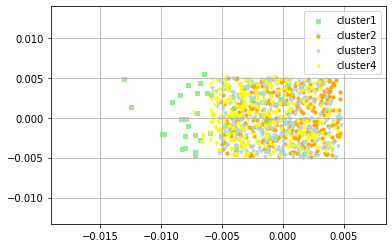

In [77]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [78]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [79]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [80]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [81]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [82]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [83]:
import scipy.spatial.distance as dist

In [84]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [85]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.012484110891819, 0.0013982312520965934, 0....",ethereum,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.065030,0.873122,0.191908,NaN
1,"[-0.009724008850753307, -0.0019968783017247915...",price,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.036482,0.247165,0.789317,NaN
45,"[-0.013053599745035172, 0.004825647454708815, ...",bitcoin,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.047263,0.201827,0.845436,NaN
375,"[-0.005861436016857624, 0.0028093408327549696,...",analysis,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.032728,0.160877,0.871852,NaN
105,"[-0.00909185316413641, 0.001998988911509514, 0...",cryptocurrency,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.032063,0.128701,0.903362,NaN
11,"[-0.009939836338162422, -0.002071268856525421,...",high,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.029408,0.102376,0.927032,NaN
106,"[-0.0015147863887250423, -0.000470600847620517...",reach,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.027505,0.099451,0.928054,NaN
57,"[-0.006819653324782848, -0.0027368830051273108...",blockchain,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.032826,0.102376,0.930450,NaN
267,"[-0.004211342427879572, -0.001759003265760839,...",peak,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.029785,0.092138,0.937646,NaN
17,"[0.0007660429691895843, 0.002797477412968874, ...",watch,0,"[-0.0042239237, 0.0003760479, 0.0042569228, 0....",0.027449,0.080438,0.947010,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
134,"[-0.00162513367831707, -0.0027982983738183975,...",nowplaying,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.028596,0.011700,1.016896,NaN
622,"[-0.002112519694492221, 0.0011313039576634765,...",simplefx,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.028264,0.008775,1.019489,NaN
690,"[0.0031644748523831367, 0.0029071224853396416,...",gründe,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.028506,0.007313,1.021193,NaN
323,"[-0.002134158741682768, 0.0016468095127493143,...",vision,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.024657,0.002925,1.021732,NaN
592,"[0.00241872388869524, 0.0009056651033461094, -...",lesson,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.026166,0.004388,1.021779,NaN
192,"[-0.0008372364100068808, 0.0032291142269968987...",worth,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.027672,0.005850,1.021822,NaN
561,"[-0.0017277454026043415, -0.000787503668107092...",good,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.027938,0.005850,1.022088,NaN
692,"[0.0026756697334349155, 0.0007649490144103765,...",anstieg,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.026776,0.004388,1.022389,NaN
38,"[0.0006243954412639141, -0.0044043343514204025...",solution,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.029837,0.007313,1.022524,NaN
742,"[0.001474181772209704, -0.0006811655475758016,...",krown,1,"[0.0002401413, 0.0001406628, 0.00031432178, 0....",0.028700,0.005850,1.022850,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 인플

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
695,"[-0.001327559701167047, 0.004666932392865419, ...",rekordhoch,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.027780,0.005850,1.021930,NaN
151,"[0.002754606306552887, -0.002909233793616295, ...",holy,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.027935,0.005850,1.022085,NaN
242,"[-0.004597377963364124, -6.0827613197034225e-0...",need,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.025158,0.002925,1.022233,NaN
479,"[0.0010115171317011118, 0.00043230870505794883...",private,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.026677,0.004388,1.022289,NaN
234,"[0.0013845363864675164, -0.0010797757422551513...",money,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.028272,0.005850,1.022422,NaN
372,"[-0.0027224316727370024, 0.0025732468347996473...",bitcointalk,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.025406,0.002925,1.022481,NaN
270,"[0.0035860922653228045, -0.003107548924162984,...",future,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.027039,0.004388,1.022652,NaN
299,"[-0.00018849271873477846, 5.8304020058130845e-...",start,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.027191,0.004388,1.022804,NaN
331,"[-0.004806537181138992, -0.0013937036274001002...",build,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.027437,0.004388,1.023049,NaN
432,"[-0.0038867208641022444, 0.0001555643393658101...",dominance,2,"[-0.0005177319, -0.00023537842, 0.00043032272,...",0.026156,0.002925,1.023231,NaN


In [89]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
378,"[-0.0008274396532215178, -0.004313133656978607...",continue,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.032363,0.062888,0.969475,NaN
14,"[-0.006626898888498545, -0.0030785324051976204...",time,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.028951,0.055576,0.973376,NaN
36,"[-0.0027309919241815805, 0.0006246900884434581...",record,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.030465,0.039488,0.990977,NaN
4,"[0.0006053043762221932, -0.0035098539665341377...",rank,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.030881,0.017550,1.013330,NaN
607,"[-0.004042328801006079, -0.0012881672009825706...",prediction,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.028613,0.013163,1.015450,NaN
380,"[-0.0004884950467385352, 0.0009471681551076472...",ethusd,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.027759,0.011700,1.016059,NaN
46,"[-0.001190326758660376, 0.0007792576216161251,...",dinero,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.029816,0.013163,1.016653,NaN
312,"[-0.0007591250468976796, 0.0006978658493608236...",explode,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.030852,0.013163,1.017690,NaN
778,"[-0.0024456775281578302, -0.002042155247181654...",monitor,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.029721,0.011700,1.018021,NaN
12,"[-0.005784003064036369, 0.00483716232702136, -...",percentage,3,"[-0.0016847313, 0.00028974697, 0.001577656, 0....",0.026866,0.008775,1.018091,NaN


In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 긍정

60

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 거래소

307

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 인플

304

In [93]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 긍정

253

In [94]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 1 # 긍정

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 12 # 거래소

In [97]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 6 # 인플

In [98]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 1 # 긍정

In [99]:
temp_cluster_result1['Silhouette'] = 0.012132743
temp_cluster_result['Silhouette'] = 0.012132743
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [100]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_ETH0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_ETH0_cosine")